In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'png'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:

import periodictable as pt
from LoadMultiFiles import LoadOneFileUproot
from importlib import reload
import FunctionFor_dE_dx
reload(FunctionFor_dE_dx)
from FunctionFor_dE_dx import  GetDirForNoOpticalAnalyze

list_elements_gen = list(pt.elements)[1:20]
list_charge = range(1,len(list_elements_gen)+1)
v_name_to_gen = []
input_list = []
symbols_list = []
n_u_list = []
v_charge = []

for i_th,(element,charge) in enumerate(zip(list_elements_gen, list_charge)):
    j = 0
    for isotopes in element.isotopes:
        if j>0:
            break
        if isotopes>= charge*2:
            v_name_to_gen.append(f"{element.name}_{isotopes}")
            input_list.append(f"{i_th+1} {isotopes} {i_th+1} 0")
            symbols_list.append(element.symbol+str(isotopes))
            n_u_list.append(isotopes)
            v_charge.append(charge)
            j+=1


dir_ion = \
{
   "name":v_name_to_gen,
    "input_list":input_list,
    "symbol":symbols_list,
    "n_u":n_u_list,
    "charge":v_charge
}
from matplotlib.colors import LogNorm
from copy import copy
dir_diff_isotopes = {}
dir_pdgID_certain = {}
n_to_plot = 20

for i_fig,name_ion in enumerate(dir_ion["name"][:n_to_plot]):
    path_file = f"/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/{name_ion}.root"
    print(path_file)
    dir_events = LoadOneFileUproot(path_file, name_branch="GdLS_log")
    dir_geninfo = LoadOneFileUproot(path_file, name_branch="genInfo")
    pdgID_certain,dir_dE_dx =GetDirForNoOpticalAnalyze(dir_events,dir_geninfo)
    dir_dE_dx["n_u"] = dir_ion["n_u"][i_fig]
    dir_diff_isotopes[name_ion] = copy(dir_dE_dx)
    dir_pdgID_certain[name_ion] = pdgID_certain

/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/hydrogen_2.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/helium_4.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/lithium_6.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/beryllium_8.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/boron_10.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/carbon_12.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/nitrogen_14.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/oxygen_16.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/fluorine_18.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/neon_20.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/sodium_22.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/magnesium_24.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/run/root/aluminum_26.root
/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simul

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


ValueError: zero-size array to reduction operation minimum which has no identity

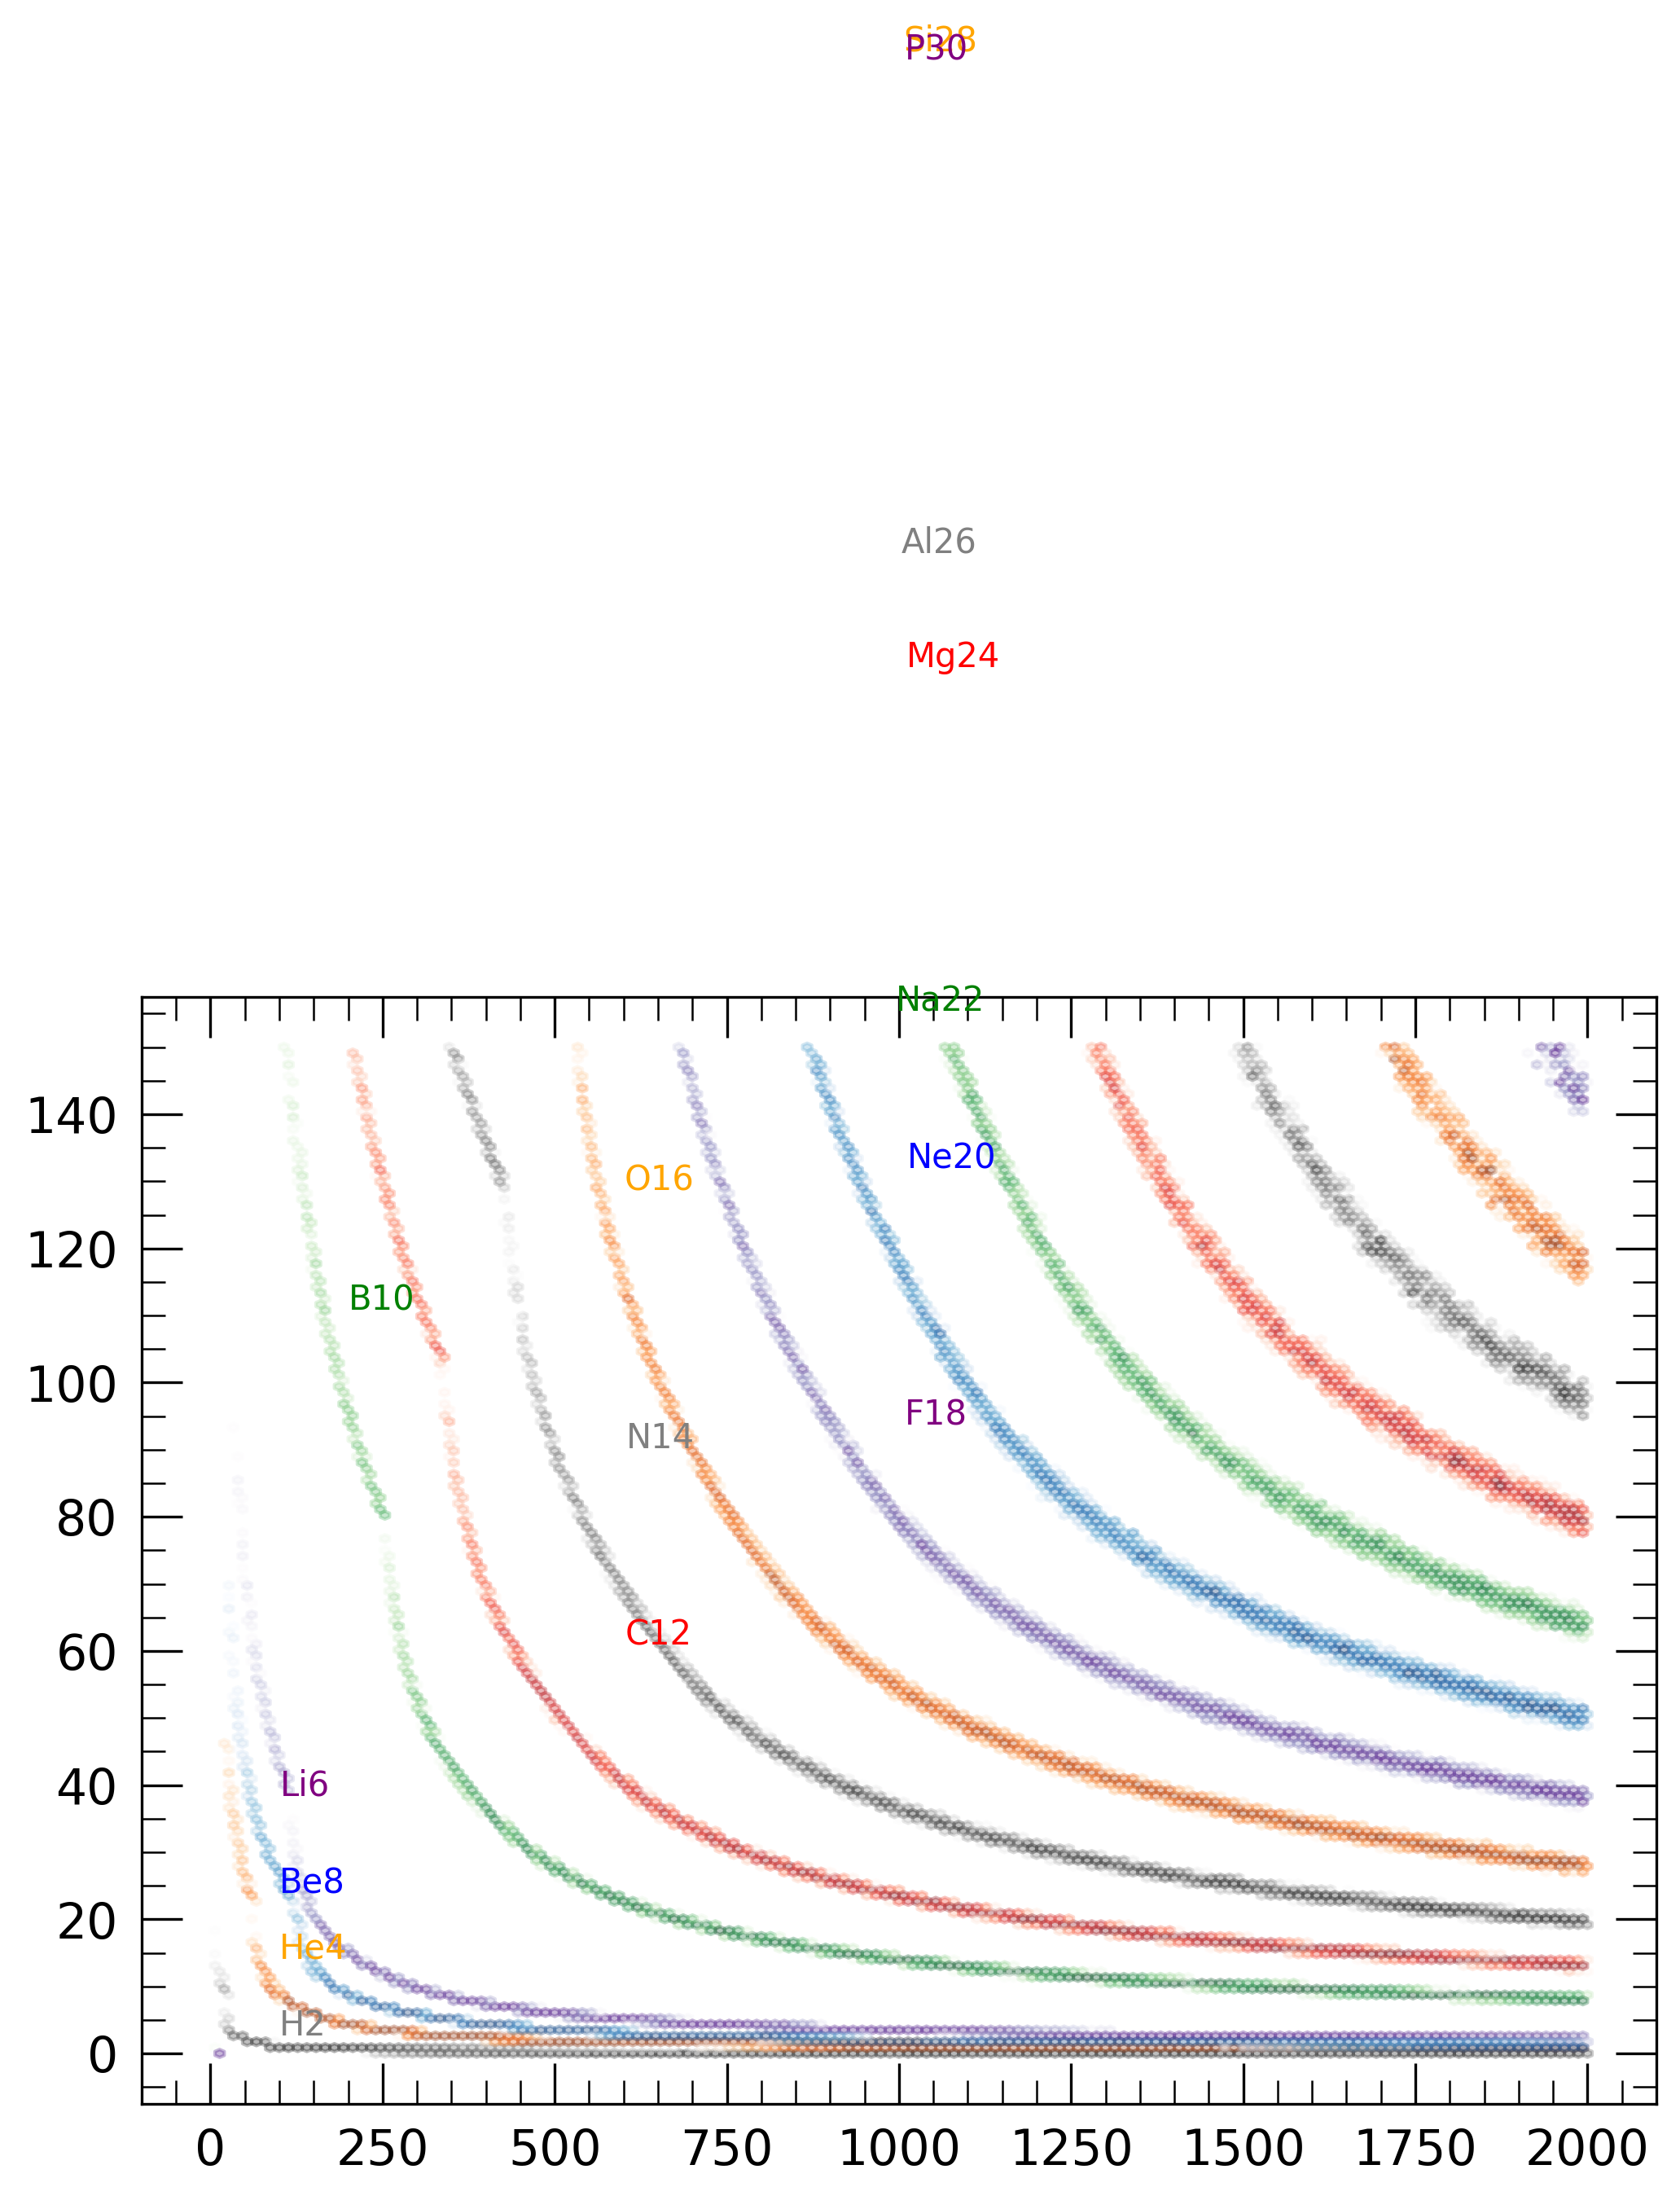

In [3]:
# v_cmap = ["Blues", "Reds", "Greens"]
v_cmap = ['Greys', 'Oranges', 'Purples', 'Blues', 'Greens', 'Reds' ]*5
v_cmap_text = ['grey', 'orange','purple', 'blue','green', 'red']*5
# v_cmap = list(plt.cm)
ext = (0, 2000, 0, 150)
for i, name_ion in enumerate(dir_ion["name"][:n_to_plot]):
    hist = plt.hexbin(dir_diff_isotopes[name_ion]["Einit"],dir_diff_isotopes[name_ion]["dE_dx"], gridsize=150,
               alpha=0.3, mincnt=10,
               norm=LogNorm(), cmap=v_cmap[i],extent=ext,label=name_ion)
    mean_y = np.mean(dir_diff_isotopes[name_ion]["dE_dx"])
    if mean_y<10:
        plt.text(0.1*np.mean(dir_diff_isotopes[name_ion]["Einit"]),np.mean(dir_diff_isotopes[name_ion]["dE_dx"]*4),
             dir_ion["symbol"][i], color=v_cmap_text[i])
    elif mean_y<50:
        plt.text(0.2*np.mean(dir_diff_isotopes[name_ion]["Einit"]),np.mean(dir_diff_isotopes[name_ion]["dE_dx"]*3),
             dir_ion["symbol"][i], color=v_cmap_text[i])
    elif mean_y>50 and mean_y<150:
        plt.text(0.6*np.mean(dir_diff_isotopes[name_ion]["Einit"]),np.mean(dir_diff_isotopes[name_ion]["dE_dx"]),
                 dir_ion["symbol"][i], color=v_cmap_text[i])
    else:
        plt.text(np.mean(dir_diff_isotopes[name_ion]["Einit"]),np.mean(dir_diff_isotopes[name_ion]["dE_dx"]*0.6),
                 dir_ion["symbol"][i], color=v_cmap_text[i])

plt.xlabel("Beam Energy [ MeV ]")
plt.ylabel("dE/dx [ MeV/mm ]")
plt.title("Different Ions in LS")

Text(0.5, 1.0, 'Different Ions in LS')

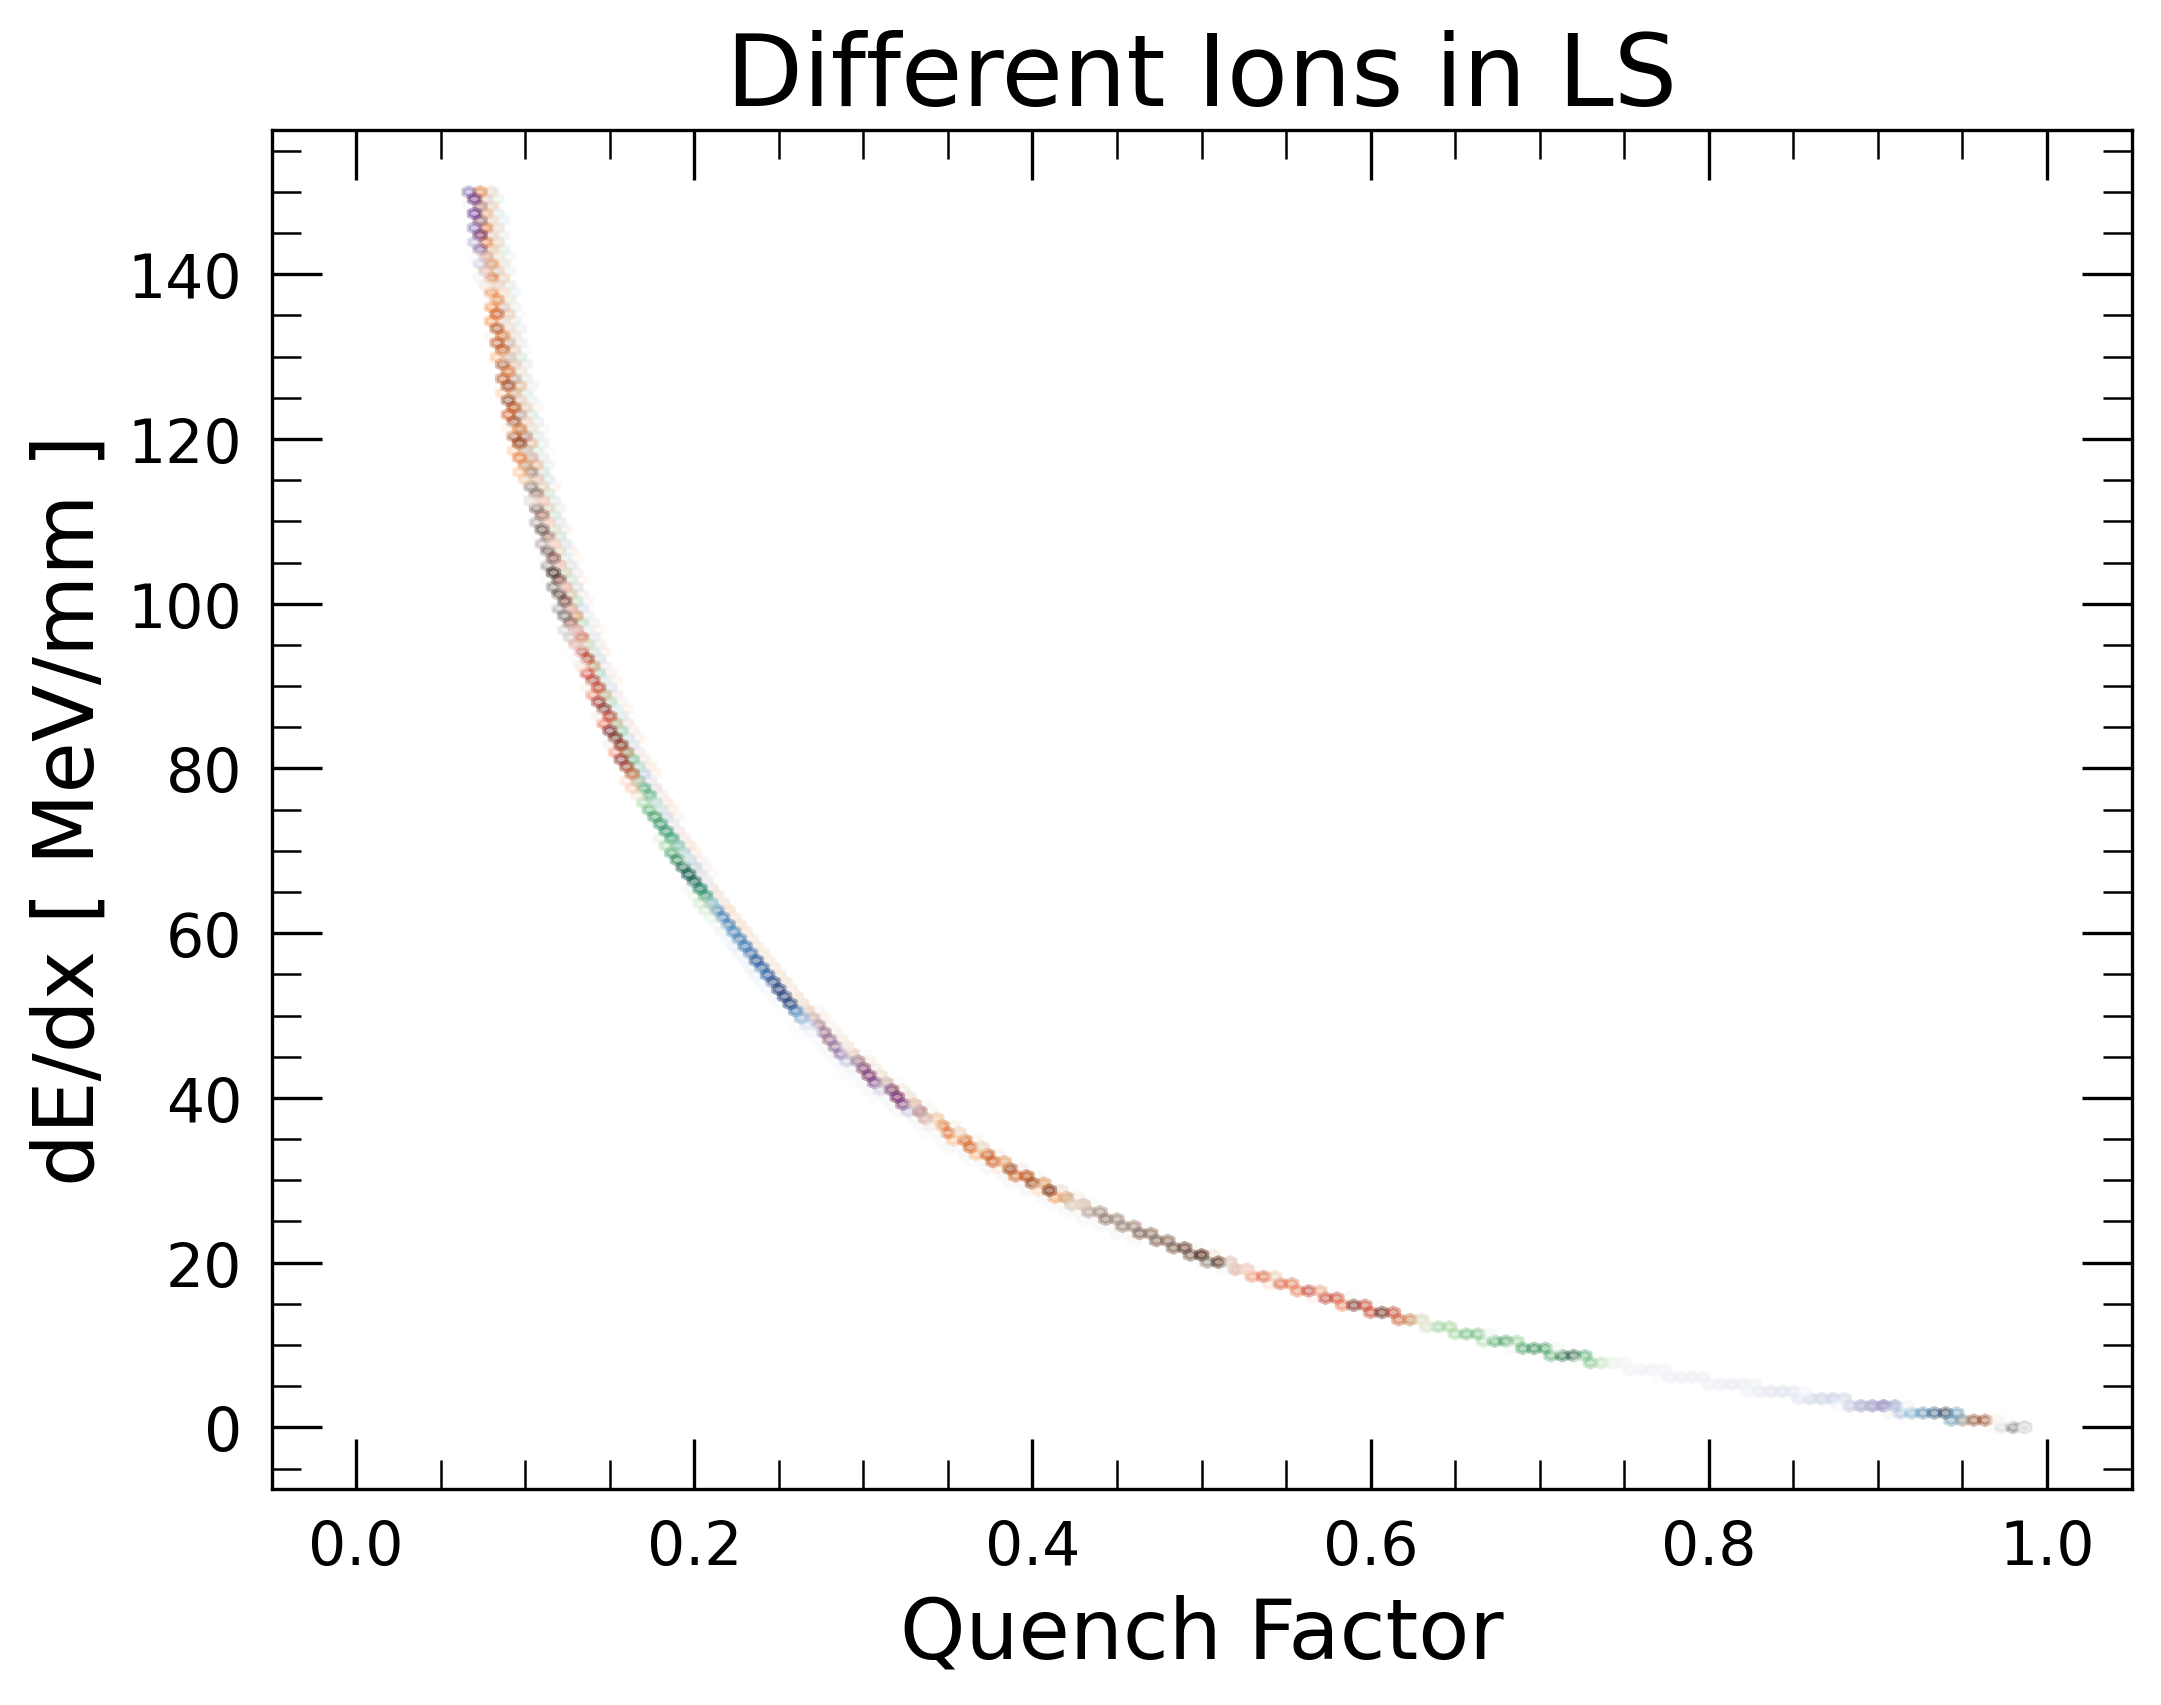

In [10]:
# v_cmap = ["Blues", "Reds", "Greens"]
v_cmap = ['Greys', 'Oranges', 'Purples', 'Blues', 'Greens', 'Reds' ]*5
v_cmap_text = ['grey', 'orange','purple', 'blue','green', 'red']*5
# v_cmap = list(plt.cm)
ext = (0, 1, 0, 150)
for i, name_ion in enumerate(dir_ion["name"][:n_to_plot]):
    QuenchFactor = dir_diff_isotopes[name_ion]["Equench"]/dir_diff_isotopes[name_ion]["Edep"]
    hist = plt.hexbin(QuenchFactor,dir_diff_isotopes[name_ion]["dE_dx"], gridsize=150,
               alpha=0.3, mincnt=10, cmap=v_cmap[i],extent=ext,label=name_ion)
    mean_y = np.mean(dir_diff_isotopes[name_ion]["dE_dx"])
    # if mean_y<10:
    #     plt.text(0.1*QuenchFactor,np.mean(dir_diff_isotopes[name_ion]["dE_dx"]*4),
    #          dir_ion["symbol"][i], color=v_cmap_text[i])
    # elif mean_y<50:
    #     plt.text(0.2*QuenchFactor,np.mean(dir_diff_isotopes[name_ion]["dE_dx"]*3),
    #          dir_ion["symbol"][i], color=v_cmap_text[i])
    # elif mean_y>50 and mean_y<150:
    #     plt.text(0.6*QuenchFactor,np.mean(dir_diff_isotopes[name_ion]["dE_dx"]),
    #              dir_ion["symbol"][i], color=v_cmap_text[i])
    # else:
    #     plt.text(QuenchFactor,np.mean(dir_diff_isotopes[name_ion]["dE_dx"]*0.6),
    #              dir_ion["symbol"][i], color=v_cmap_text[i])

plt.xlabel("Quench Factor")
plt.ylabel("dE/dx [ MeV/mm ]")
plt.title("Different Ions in LS")

In [ ]:
# v_cmap = ["Blues", "Reds", "Greens"]
from HistTools import GetBinCenter

v_cmap = ['Greys','Greens', 'Oranges',  'Blues','Purples' , 'Reds' ]*5
v_cmap_text = ['grey','green', 'orange', 'blue','purple', 'red']*5
# v_cmap = list(plt.cm)
ext = (0, 200, 0, 150)
n_bins = 150
for i, name_ion in enumerate(dir_ion["name"][:n_to_plot]):
    plt.hexbin(dir_diff_isotopes[name_ion]["Einit"]/dir_diff_isotopes[name_ion]['n_u'],dir_diff_isotopes[name_ion]["dE_dx"], gridsize=n_bins,
               alpha=0.3, mincnt=10,
               norm=LogNorm(), cmap=v_cmap[i],extent=ext,label=name_ion)
    mean_y = np.mean(dir_diff_isotopes[name_ion]["dE_dx"])
    mean_x = np.mean(dir_diff_isotopes[name_ion]["Einit"])/dir_diff_isotopes[name_ion]['n_u']


    if dir_ion["charge"][i]*2 >= dir_diff_isotopes[name_ion]['n_u']:
        mean_x *= 1.2
        mean_y *= 0.9
    else:
        mean_x *= 1.1

    if "H" in dir_ion["symbol"][i] and not "He" in dir_ion["symbol"][i]:
        mean_x *= 0.1
    if mean_y<30:
        plt.text(mean_x/4,np.mean(dir_diff_isotopes[name_ion]["dE_dx"]),
             dir_ion["symbol"][i], color=v_cmap_text[i])
    elif mean_y>30 :
        plt.text(1.6*mean_x,np.mean(dir_diff_isotopes[name_ion]["dE_dx"])/4,
                 dir_ion["symbol"][i], color=v_cmap_text[i])


plt.xlabel("Beam Energy [ MeV/u ]")
plt.ylabel("dE/dx [ MeV/mm ]")
plt.title("Different Ions in LS")

In [ ]:
# v_cmap = ["Blues", "Reds", "Greens"]
from HistTools import GetBinCenter
v_cmap = ['Greys','Greens', 'Oranges',  'Blues','Purples' , 'Reds' ]*5
v_cmap_text = ['grey','green', 'orange', 'blue','purple', 'red']*5
# v_cmap = list(plt.cm)
ext = (0, 400, -0.8, 2)
n_bins = 150
for i, name_ion in enumerate(dir_ion["name"][:n_to_plot]):
    plt.hexbin(dir_diff_isotopes[name_ion]["Einit"]/dir_diff_isotopes[name_ion]['n_u'],dir_diff_isotopes[name_ion]["dE_dx"], gridsize=n_bins,
               alpha=0.3, mincnt=10,yscale="log",
               norm=LogNorm(), cmap=v_cmap[i],extent=ext,label=name_ion)
    mean_y = np.mean(dir_diff_isotopes[name_ion]["dE_dx"])
    mean_x = np.mean(dir_diff_isotopes[name_ion]["Einit"])/dir_diff_isotopes[name_ion]['n_u']

    if dir_ion["charge"][i]*2 >= dir_diff_isotopes[name_ion]['n_u']:
        mean_x *= 1.2
        mean_y *= 0.9

    if "H" in dir_ion["symbol"][i] and not "He" in dir_ion["symbol"][i]:
        mean_x *= 0.5
    if mean_y<50:
        plt.text(mean_x/2,np.mean(dir_diff_isotopes[name_ion]["dE_dx"]/2),
             dir_ion["symbol"][i], color=v_cmap_text[i])
    elif mean_y>50 :
        plt.text(1.6*mean_x,np.mean(dir_diff_isotopes[name_ion]["dE_dx"])/4,
                 dir_ion["symbol"][i], color=v_cmap_text[i])

plt.xlabel("Beam Energy [ MeV/u ]")
plt.ylabel("dE/dx [ MeV/mm ]")
plt.title("Different Ions in LS")